In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
nyc_taxi_data = pd.read_csv("/content/dataset.csv")

# Display basic info
print("Dataset Overview:")
print(nyc_taxi_data.info())
print("\nFirst 5 rows:")
print(nyc_taxi_data.head())

# Check for null values
print("\nMissing Values:")
print(nyc_taxi_data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(nyc_taxi_data.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10320 non-null  int64 
 1   timestamp   10320 non-null  object
 2   value       10320 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 242.0+ KB
None

First 5 rows:
   Unnamed: 0            timestamp  value
0           0  2014-07-01 00:00:00  10844
1           1  2014-07-01 00:30:00   8127
2           2  2014-07-01 01:00:00   6210
3           3  2014-07-01 01:30:00   4656
4           4  2014-07-01 02:00:00   3820

Missing Values:
Unnamed: 0    0
timestamp     0
value         0
dtype: int64

Summary Statistics:
       Unnamed: 0     value
count   10,320.00 10,320.00
mean     5,159.50 15,137.57
std      2,979.27  6,939.50
min          0.00      8.00
25%      2,579.75 10,262.00
50%      5,159.50 16,778.00
75%      7,739.25 19,838.75
max     10,319.00 39,197.00

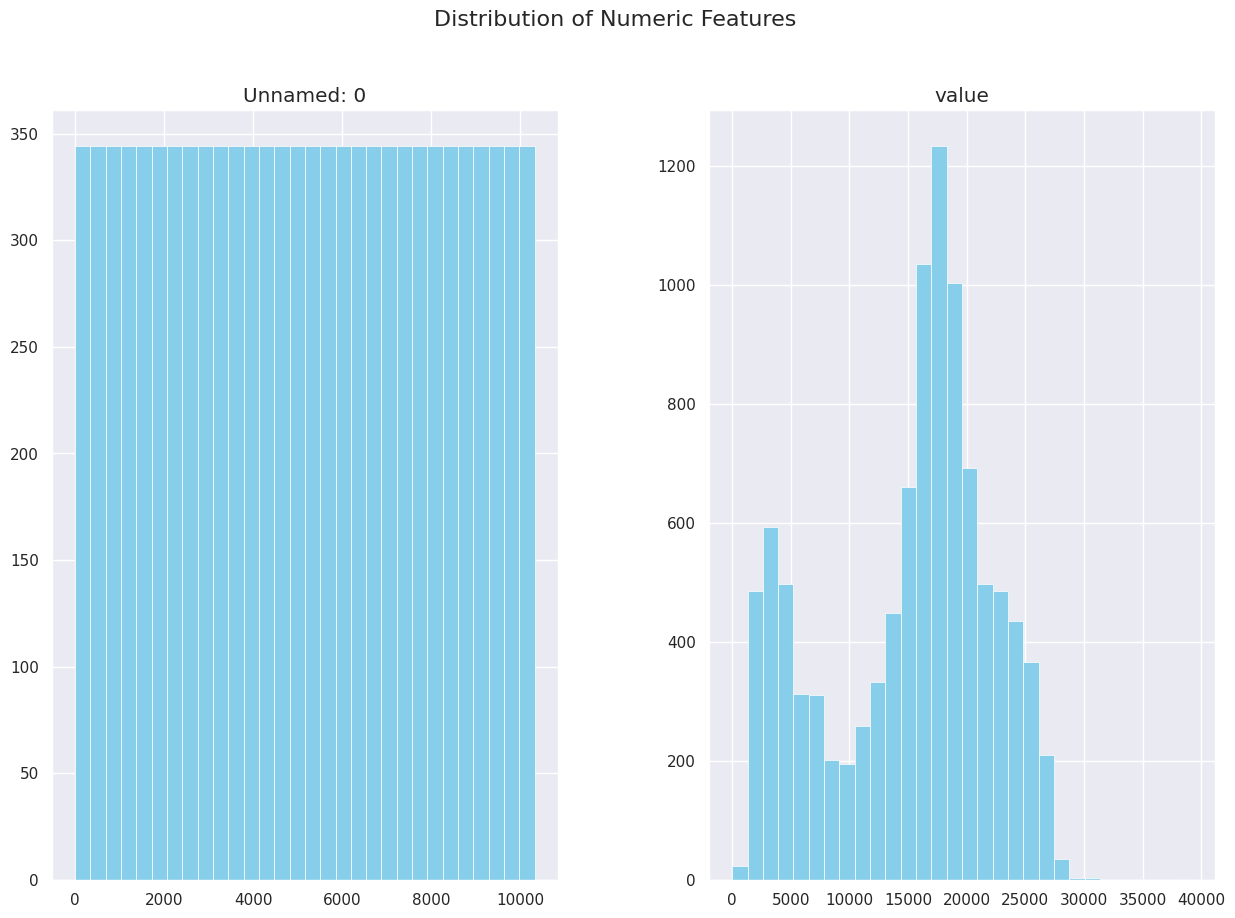

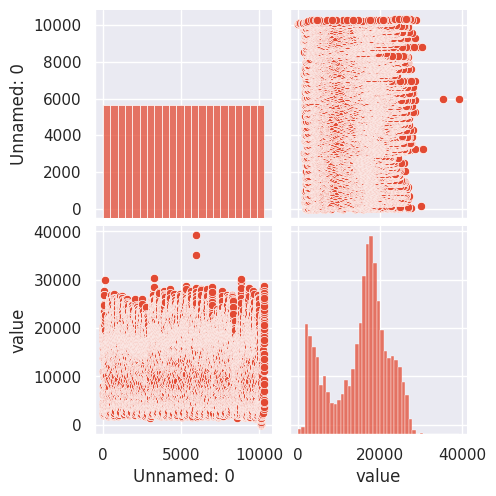

In [4]:
# Visualizing numeric columns
nyc_taxi_data.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

# Pairplot for initial insight
sns.pairplot(nyc_taxi_data)
plt.show()

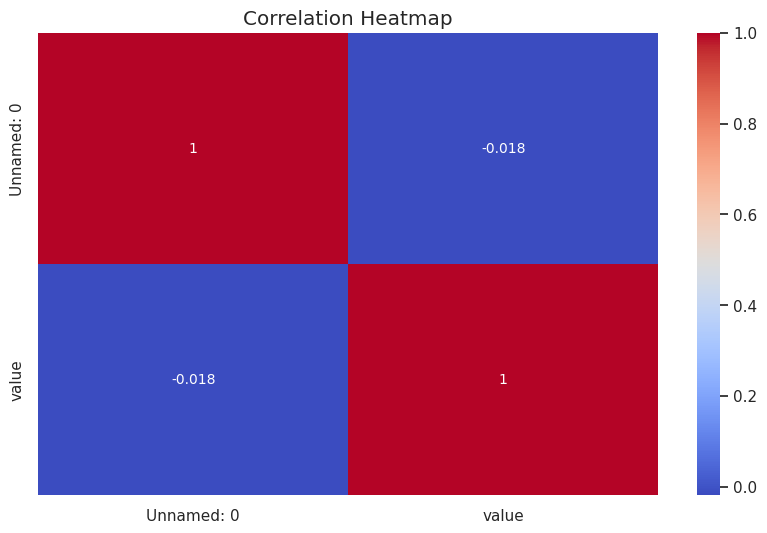

In [5]:
# Exclude non-numeric columns (like datetime columns) from the correlation calculation
numeric_data = nyc_taxi_data.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# Handling missing values for numeric columns only
numeric_columns = nyc_taxi_data.select_dtypes(include=[np.number]).columns
nyc_taxi_data[numeric_columns] = nyc_taxi_data[numeric_columns].fillna(nyc_taxi_data[numeric_columns].median())

# Check for duplicates
duplicates = nyc_taxi_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
nyc_taxi_data.drop_duplicates(inplace=True)

# Handle outliers using the IQR method
Q1 = nyc_taxi_data[numeric_columns].quantile(0.25)
Q3 = nyc_taxi_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers (e.g., 1.5*IQR rule)
filtered_data = nyc_taxi_data[~((nyc_taxi_data[numeric_columns] < (Q1 - 1.5 * IQR)) |
                                (nyc_taxi_data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Data size after removing outliers: {filtered_data.shape}")

Number of duplicate rows: 0
Data size after removing outliers: (10318, 3)
